## Using MLlib

The first concept to know is that MLlib is built to optimize iterations. To that end there are 3 important concepts to keep in mind: **Transformers**, **Estimators**, and **Pipelines**. Pipelines are how machine learning is 'automated' with MLlib, but first let's build the ideas of transformers and estimators. 

### Transformers
A transfomer a method that takes the dataframe you are working on in to a new dataframe. 

You can call transformers with the `.transform()` method of transformer objects. 

### Example:
* [Tokenizer](https://spark.apache.org/docs/latest/ml-features.html#tokenizer)
* [Normalizer](https://spark.apache.org/docs/latest/ml-features.html#normalizer)

*This example is taken from the Tokenizer documentation example*

```
sentenceDataFrame = spark.createDataFrame([
    (0, "Hi I heard about Spark"),
    (1, "I wish Java could use case classes"),
    (2, "Logistic,regression,models,are,neat")
], ["id", "sentence"])

tokenizer = Tokenizer(inputCol="sentence", outputCol="words")
tokenized = tokenizer.transform(sentenceDataFrame)
tokenized.select("sentence", "words")\
    .withColumn("tokens", countTokens(col("words"))).show(truncate=False)
```
### Estimators
Estimators are a subsection of transformers. Estimators fit the data's parameters and returns a model of how to shape the data. You do this by calling the `.fit()` method of estimator objects to fit the estimator to the data and then call the `.transform()` method to transform the dataframe into the desired dataframe.

The main difference between **Transformers** and **Estimators** is estimators take and learn data parameters. Transformers do not. 

### Examples:
* [OneHotEncoder](https://spark.apache.org/docs/latest/ml-features.html#onehotencoder)
* [StringIndexing](https://spark.apache.org/docs/latest/ml-features.html#stringindexer)
* [MinMaxScaler](https://spark.apache.org/docs/latest/ml-features.html#minmaxscaler)

[This website](https://spark.apache.org/docs/latest/ml-features.html) shows a comprehensive list of transformers, estimators, and their implementation that are available to use in MLlib. 

*This example is taken from the MinMaxScaler documentation example*

```
dataFrame = spark.createDataFrame([
    (0, Vectors.dense([1.0, 0.1, -1.0]),),
    (1, Vectors.dense([2.0, 1.1, 1.0]),),
    (2, Vectors.dense([3.0, 10.1, 3.0]),)
], ["id", "features"])

scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

scalerModel = scaler.fit(dataFrame)

scaledData = scalerModel.transform(dataFrame)
```

### Differences from Sklearn
Unlike Sklearn, MLlib requires that all features are in one column and the targets are in a separate column. Targets are also referred to as labels. 
```
feat_cols = [avg, feat_engin, col_calcs, etc.]
assembler = VectorAssembler(inputCols = cols,outputCol = 'features')
```

### Examples of Implementation

# Demonstrating MLlib

### Regression Model Building

In [0]:
#First thing, get the data. The data we will be using in the project will be the 'trees'.
#Running this box should automatically get you that data.

import statsmodels.api as sm
import numpy as np
import pandas as pd
import plotnine as p9
import seaborn as sns
import pyspark.sql.functions as F

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

mtcars = sm.datasets.get_rdataset("trees", "datasets", cache=True).data
dat = pd.DataFrame(mtcars)
dat.head(3)


df=spark.createDataFrame(dat)

#### Setup DataFrame for ML

In [0]:
df.columns

Out[50]: ['Girth', 'Height', 'Volume']

Out[51]:

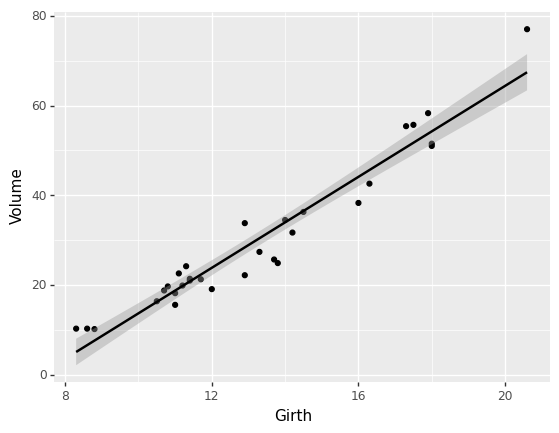

<ggplot: (8772941825226)>

In [0]:
pt = df.select("*").toPandas()
p9.ggplot(data = pt, mapping=p9.aes(x="Girth",y="Volume"))+p9.geom_point() + p9.geom_smooth(method = "lm")


Out[52]:

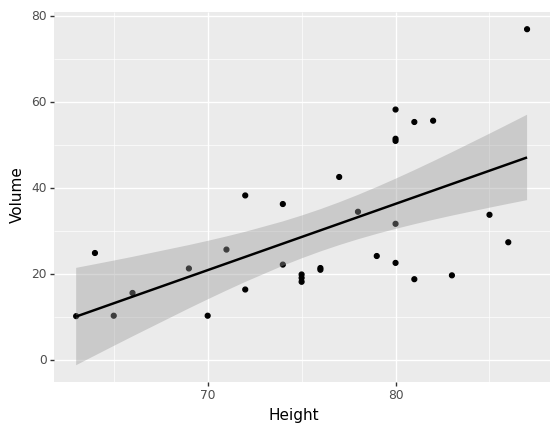

<ggplot: (8772945083871)>

In [0]:
p9.ggplot(data = pt, mapping=p9.aes(x="Height",y="Volume"))+p9.geom_point() + p9.geom_smooth(method = "lm")

In [0]:
# Here, we are going to pick out which columns we want as our features

cols = ['Girth', 'Height']

assembler = VectorAssembler(inputCols = cols,
                           outputCol = 'features')

In [0]:
# For this package to work, we need to put all of our features into an array.
# So, what this code is doing, is taking all our defined features from our
# data and storing them as an array in 'output'

output = assembler.transform(df)
output.display()

Girth,Height,Volume,features
8.3,70,10.3,"Map(vectorType -> dense, length -> 2, values -> List(8.3, 70.0))"
8.6,65,10.3,"Map(vectorType -> dense, length -> 2, values -> List(8.6, 65.0))"
8.8,63,10.2,"Map(vectorType -> dense, length -> 2, values -> List(8.8, 63.0))"
10.5,72,16.4,"Map(vectorType -> dense, length -> 2, values -> List(10.5, 72.0))"
10.7,81,18.8,"Map(vectorType -> dense, length -> 2, values -> List(10.7, 81.0))"
10.8,83,19.7,"Map(vectorType -> dense, length -> 2, values -> List(10.8, 83.0))"
11.0,66,15.6,"Map(vectorType -> dense, length -> 2, values -> List(11.0, 66.0))"
11.0,75,18.2,"Map(vectorType -> dense, length -> 2, values -> List(11.0, 75.0))"
11.1,80,22.6,"Map(vectorType -> dense, length -> 2, values -> List(11.1, 80.0))"
11.2,75,19.9,"Map(vectorType -> dense, length -> 2, values -> List(11.2, 75.0))"


#### Preparing the Data

In [0]:
# This is one way of putting together your "prepared/cleaned" data
final_df = output.select("features","Volume")
#final_df.display()

In [0]:
# Here you decide how to split your data
train_data, test_data = final_df.randomSplit([0.7, 0.3])

#train_data.display()
#test_data.display()

In [0]:
# In this chunck and the one below, you can use the describe to find out the size of your data and how the 2 samples compare.
# This dataset is rather small, but I would still say that the mean and std for both are close in value.
train_data.describe().show()

+-------+------------------+
summary| Volume|
+-------+------------------+
 count| 21|
 mean|31.671428571428567|
 stddev|16.948189958138386|
 min| 10.2|
 max| 77.0|
+-------+------------------+

In [0]:
test_data.describe().show()

+-------+------------------+
summary| Volume|
+-------+------------------+
 count| 10|
 mean|27.020000000000003|
 stddev|15.686852244262813|
 min| 10.3|
 max| 55.7|
+-------+------------------+

#### Building the Regression Model

In [0]:
lm = LinearRegression(labelCol = "Volume")
model = lm.fit(train_data)
pd.DataFrame({"Coefficients":model.coefficients}, index = cols)

Out[59]:

,Coefficients
Girth,4.790903
Height,0.245147


In [0]:
res = model.evaluate(test_data)
res.residuals.show()

/databricks/spark/python/pyspark/sql/context.py:134: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
+--------------------+
 residuals|
+--------------------+
 5.241003744789655|
-0.24223641065790602|
 -1.2023089694107458|
 1.886549109026653|
-0.06680841055761988|
 0.4086195895426705|
 -5.263478644342289|
 -4.826543068981486|
 4.73780663084046|
 3.834479569473956|
+--------------------+

In [0]:
unlabeled_data = test_data.select("features")
predictions = model.transform(unlabeled_data)
predictions.show()

+-----------+------------------+
 features| prediction|
+-----------+------------------+
 [8.6,65.0]| 5.058996255210346|
[10.7,81.0]|19.042236410657907|
[11.0,66.0]|16.802308969410745|
[11.1,80.0]| 20.71345089097335|
[11.2,75.0]| 19.96680841055762|
[11.7,69.0]| 20.89138041045733|
[13.7,71.0]| 30.96347864434229|
[13.8,64.0]|29.726543068981485|
[17.3,81.0]| 50.66219336915954|
[17.5,82.0]| 51.86552043052605|
+-----------+------------------+

#### Model Metrics

In [0]:
print("MAE: ", res.meanAbsoluteError)
print("MSE: ", res.meanSquaredError)
print("AMSE: ", res.rootMeanSquaredError)
print("R2: ", res.r2)
print("Adj R2: ", res.r2adj)

MAE: 2.7709834147623438
MSE: 12.085261713905123
AMSE: 3.4763863010179294
R2: 0.9454315097245621
Adj R2: 0.9298405125030085

### Classification Model Building

In this section we will contrast common sklearn classification models and model building techniques to the MLlib equivalent. 


__Random Forests__:

Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

MLlib: https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-classifier

__Decision Tree__:

Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

MLlib: https://spark.apache.org/docs/latest/ml-classification-regression.html#decision-tree-classifier

##### Data for Sklearn

In [0]:
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

iris = sm.datasets.get_rdataset("iris", "datasets", cache=True).data

features = iris.drop(columns = ["Species"])
target = iris.filter(items = ["Species"])

X_train_sk, X_test_sk, y_train_sk, y_test_sk = train_test_split(features, target, test_size=0.2, random_state=314)

##### Data for MLlib

In [0]:
iris = sm.datasets.get_rdataset("iris", "datasets", cache=True).data
dat = pd.DataFrame(iris)
iris_mllib = spark.createDataFrame(dat)
iris_mllib = (iris_mllib
              .withColumnRenamed('Sepal.Length', 'Sepal_Length')
              .withColumnRenamed('Sepal.Width', 'Sepal_Width')
              .withColumnRenamed('Petal.Length', 'Petal_Length')
              .withColumnRenamed('Petal.Width', 'Petal_Width')
             )

In [0]:
# PySpark only works with numeric values. Every piece of data must be some form of numeric, even the target. 
from pyspark.ml.feature import StringIndexer

iris_mllib = (
    StringIndexer(
        inputCol='Species',
        outputCol='Species2',
        handleInvalid='keep')
    .fit(iris_mllib)
    .transform(iris_mllib)
    .drop('Species')
    .withColumnRenamed('Species2', 'Species'))

iris_mllib.show(2)

+------------+-----------+------------+-----------+-------+
Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|Species|
+------------+-----------+------------+-----------+-------+
 5.1| 3.5| 1.4| 0.2| 0.0|
 4.9| 3.0| 1.4| 0.2| 0.0|
+------------+-----------+------------+-----------+-------+
only showing top 2 rows

In [0]:
# Spark actually works to predict with a column with all the features smashed together into an array for each row of values in the dataset. 
from pyspark.ml.feature import VectorAssembler

# this next like of code make a new column with the feature values in each row and smashes them into an array and calls in 'features' 
assembler = VectorAssembler(
    inputCols=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], 
    outputCol='features')

# now use .transform() to finish making the dataset
transformed_data = assembler.transform(iris_mllib)
transformed_data.show(2)

+------------+-----------+------------+-----------+-------+-----------------+
Sepal_Length|Sepal_Width|Petal_Length|Petal_Width|Species| features|
+------------+-----------+------------+-----------+-------+-----------------+
 5.1| 3.5| 1.4| 0.2| 0.0|[5.1,3.5,1.4,0.2]|
 4.9| 3.0| 1.4| 0.2| 0.0|[4.9,3.0,1.4,0.2]|
+------------+-----------+------------+-----------+-------+-----------------+
only showing top 2 rows

In [0]:
training_data, test_data = transformed_data.randomSplit([0.8,0.2])

#### Random Forests

##### Sklearn

In [0]:
from sklearn.ensemble import RandomForestClassifier
sklearn_rf = RandomForestClassifier()

In [0]:
sklearn_rf.fit(X_train_sk, y_train_sk)
sklearn_rf_predictions = sklearn_rf.predict(X_test_sk)
result = accuracy_score(y_test_sk, sklearn_rf_predictions)

print("Sklearn Random Forest Accuracy:", round(result, 3))

/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_sklearn.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
Sklearn Random Forest Accuracy: 0.933

##### MLlib

In [0]:
from pyspark.ml.classification import RandomForestClassifier

pyspark_rf = RandomForestClassifier(
    labelCol='Species', # this is how we set the target variable
    featuresCol='features') # this is how we set the feature variables

In [0]:
pyspark_rf_model = pyspark_rf.fit(training_data) # training the model
predictions = pyspark_rf_model.transform(test_data) # making predictions

In [0]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol='Species', 
    predictionCol='prediction', 
    metricName='accuracy')

accuracy = evaluator.evaluate(predictions)
print('MLlib Random Forest Accuracy = ', round(accuracy, 3)) 

MLlib Random Forest Accuracy = 0.955

#### Decision Tree

##### Sklearn

In [0]:
from sklearn.tree import DecisionTreeClassifier
sklearn_dt = DecisionTreeClassifier()

In [0]:
sklearn_dt.fit(X_train_sk, y_train_sk)
sklearn_dt_predictions = sklearn_dt.predict(X_test_sk)
result = accuracy_score(y_test_sk, sklearn_dt_predictions)

print("Sklearn Decision Tree Accuracy:", round(result, 3))

Sklearn Decision Tree Accuracy: 0.9

##### MLlib

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
pyspark_dt = DecisionTreeClassifier(
    labelCol="Species", 
    featuresCol="features")

In [0]:
pyspark_dt_model = pyspark_dt.fit(training_data) # training the model
predictions = pyspark_dt_model.transform(test_data) # making predictions

In [0]:
# Evaluate our model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(
    labelCol='Species', 
    predictionCol='prediction', 
    metricName='accuracy')

accuracy = evaluator.evaluate(predictions)
print('MLlib Decision Tree Accuracy: ', round(accuracy, 3)) 

MLlib Decision Tree Accuracy: 0.955

### Clustering Example

In [0]:
### Import Libraries
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import StandardScaler
from pyspark.ml.functions import vector_to_array

### Importing data
#R  data
women = sm.datasets.get_rdataset("women", "datasets", cache=True).data
dat = pd.DataFrame(women)
df1=spark.createDataFrame(dat)

#### Formatting the data for MLlib Clustering
This is the primary difference between MLlib and Scikit-Learn or some other machine learning libraries because the data has to be formatted very specifically to work with the MLlib clustering models. We need a column with our group that we're trying to predict and then we need one more column that has all of our features in a vector.

In [0]:
# Specifying our feature columns
feat_col = ['height','weight']
# Shoves all of our features into a single vector column
feature_vector = VectorAssembler(inputCols = feat_col, outputCol = 'features') ### Note for self: maybe explore this functionality before presentation --Hathway will probably ask what it does specifically
#Adding our features vector column to our original dataset
data = feature_vector.transform(df1)
final_data = feature_vector.transform(df1).select('features')

In [0]:
### Shows what our dataset looks like with the vector feature column before we drop the extra weight column
display(data)

height,weight,features
58,115,"Map(vectorType -> dense, length -> 2, values -> List(58.0, 115.0))"
59,117,"Map(vectorType -> dense, length -> 2, values -> List(59.0, 117.0))"
60,120,"Map(vectorType -> dense, length -> 2, values -> List(60.0, 120.0))"
61,123,"Map(vectorType -> dense, length -> 2, values -> List(61.0, 123.0))"
62,126,"Map(vectorType -> dense, length -> 2, values -> List(62.0, 126.0))"
63,129,"Map(vectorType -> dense, length -> 2, values -> List(63.0, 129.0))"
64,132,"Map(vectorType -> dense, length -> 2, values -> List(64.0, 132.0))"
65,135,"Map(vectorType -> dense, length -> 2, values -> List(65.0, 135.0))"
66,139,"Map(vectorType -> dense, length -> 2, values -> List(66.0, 139.0))"
67,142,"Map(vectorType -> dense, length -> 2, values -> List(67.0, 142.0))"


#### Standardizing data 
This is especially important for K-Means with multiple feature columns as the primary goal of the algorithm is to calculate the euclidean distance between the current point and the centroid. If we have variables with significantly different magnitudes such as age vs salary, this has the potential to skew our model.

In [0]:
scaler = StandardScaler(inputCol = 'features', outputCol = 'zfeatures', withStd = True, withMean = False)
scalerModel = scaler.fit(final_data)  ### Check more in detail what this is doing
cluster_input_data = scalerModel.transform(final_data)

#### Training/Evaluating the Model

In [0]:
### Training the model
kmeans = KMeans(featuresCol = 'zfeatures', k=2) #Where K is the number of clusters
model1 = kmeans.fit(cluster_input_data)

predictions = model1.transform(cluster_input_data)

In [0]:
### Seeing the centroids chosen for each cluster
centers = model1.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Cluster Centers: 
[13.75181806 8.04099996]
[15.42886904 9.71510413]

In [0]:
### Shows our cluster predictions for each row in our data 
cluster_output = model1.transform(cluster_input_data).select('zfeatures', 'prediction')
rows = cluster_output.collect()
df_predictions = spark.createDataFrame(rows)
display(df_predictions)

zfeatures,prediction
"Map(vectorType -> dense, length -> 2, values -> List(12.96919426949878, 7.419979906702922))",0
"Map(vectorType -> dense, length -> 2, values -> List(13.192801067248759, 7.549023035515147))",0
"Map(vectorType -> dense, length -> 2, values -> List(13.416407864998737, 7.7425877287334846))",0
"Map(vectorType -> dense, length -> 2, values -> List(13.640014662748717, 7.936152421951822))",0
"Map(vectorType -> dense, length -> 2, values -> List(13.863621460498695, 8.129717115170159))",0
"Map(vectorType -> dense, length -> 2, values -> List(14.087228258248675, 8.323281808388495))",0
"Map(vectorType -> dense, length -> 2, values -> List(14.310835055998654, 8.516846501606834))",0
"Map(vectorType -> dense, length -> 2, values -> List(14.534441853748632, 8.71041119482517))",0
"Map(vectorType -> dense, length -> 2, values -> List(14.758048651498612, 8.96849745244962))",1
"Map(vectorType -> dense, length -> 2, values -> List(14.98165544924859, 9.162062145667957))",1


#### Finding Best Value for K
MLlib predominantly uses the Silhouette method to find the best value for K as the function to calculate Within Sum of Squares to make an elbow plot was deprecated in Spark 3.0.1 <br>
For the Silhouette score, it will return a number between - 1 and 1. The closer to 1 the Silhouette is, the better.

In [0]:
### Silhouettes
silhouettes = []
for k in range (2,16): #You can test as many k values as you would like however it gets significantly longer when doing so
    kmeans = KMeans(featuresCol = 'zfeatures', k=k)
    model2 = kmeans.fit(cluster_input_data)
    predictions = model2.transform(cluster_input_data)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouettes.append(silhouette)

print(silhouettes)
print(max(silhouettes))

[0.7619398965147026, 0.691302770804029, 0.6196919561742695, 0.5539673611518979, 0.466618687099991, 0.4596968717786307, 0.36505526271373573, 0.19036179942056455, 0.05751442457319204, -0.02248557542680795, 0.010847757906525384, 0.0318250377072933, -0.023076923076923075, 0.0]
0.7619398965147026

#### Graphing the Clusters
This seems to be slightly more complicated because you can only transform your predictions onto the data where all of your features are in a vector which cannot be graphed that way. However fortunately for us we can do this by using the vector_to_array function and then explode the array and go from there.

In [0]:
graph_df = (cluster_output.withColumn("features", vector_to_array("zfeatures"))).select(['features'] + ['prediction'])
graph_df=graph_df.withColumn('height', F.col('features').getItem(0))
graph_df=graph_df.withColumn('weight', F.col('features').getItem(1))   
graph_df = graph_df.select(['prediction'] + ['height'] + ['weight'])
display(graph_df)

prediction,height,weight
0,12.96919426949878,7.419979906702922
0,13.192801067248759,7.549023035515147
0,13.416407864998737,7.7425877287334846
0,13.640014662748717,7.936152421951822
0,13.863621460498695,8.129717115170159
0,14.087228258248675,8.323281808388495
0,14.310835055998654,8.516846501606834
0,14.534441853748632,8.71041119482517
1,14.758048651498612,8.96849745244962
1,14.98165544924859,9.162062145667957


Out[87]:

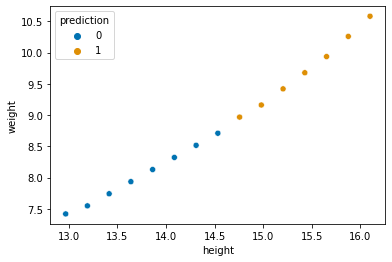

<AxesSubplot:xlabel='height', ylabel='weight'>

In [0]:
pd_graph = graph_df.select("*").toPandas()
pd_graph['prediction'] = pd_graph['prediction'].astype(str)
#p9.ggplot(data = pd_graph, mapping=p9.aes(x="height",y="weight", color = "prediction"))+p9.geom_point()
sns.scatterplot(data=pd_graph, x="height", y="weight", hue = "prediction",palette="colorblind")

## Pipelines

In [0]:
from pyspark.ml import Pipeline

iris = sm.datasets.get_rdataset("iris", "datasets", cache=True).data
dat = pd.DataFrame(iris)
iris_mllib = spark.createDataFrame(dat)
iris_mllib = (iris_mllib
              .withColumnRenamed('Sepal.Length', 'Sepal_Length')
              .withColumnRenamed('Sepal.Width', 'Sepal_Width')
              .withColumnRenamed('Petal.Length', 'Petal_Length')
              .withColumnRenamed('Petal.Width', 'Petal_Width')
             )
# split the data
training_data_a, test_data_a = iris_mllib.randomSplit([0.8,0.2])
# make sure your target column is called label
strings_indexed = StringIndexer(inputCol='Species',outputCol='label',handleInvalid='keep')
# breaking up what the features and targets are
assembler = VectorAssembler(inputCols=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], outputCol='features')
# put the model here 
pyspark_rf = RandomForestClassifier(
    labelCol='label', # this is how we set the target variable
    featuresCol='features')

# building the pipeline
class_pipe = Pipeline(stages = [strings_indexed, assembler, pyspark_rf])
# an estimator is being used
class_pipe_model = class_pipe.fit(training_data_a)
# 'transforming' predictions onto the test data
pred_pipe_model = class_pipe_model.transform(test_data_a)
# seeing the new predictions on the test data frame
# display(pred_pipe_model)

# if the label column is called something else
accuracy_dict = {'target':'label'}

print('Accuracy') 
MulticlassClassificationEvaluator(metricName="accuracy").evaluate(pred_pipe_model)

Accuracy
Out[88]: 1.0

## Hyperparameter Tuning

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

#establish the parameters to test. 
# Go to the link to look at the different hyperparameters
#https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.classification.RandomForestClassifier.html#pyspark.ml.classification.RandomForestClassifier.setParams
paramGrid = (ParamGridBuilder()
             .addGrid(pyspark_rf.maxDepth, [1,2, 3])
             .addGrid(pyspark_rf.maxBins, [4,8,16])
#              .addGrid(pyspark_rf.numTrees, [5,10,15,20,25,30])
             .build())

# create how to evaluate the best model
rf_eval = MulticlassClassificationEvaluator(metricName="accuracy")

# create the cross validator
rf_cv = CrossValidator(estimator=class_pipe, estimatorParamMaps=paramGrid, evaluator=rf_eval, numFolds=3, parallelism = 4)

# actually running the cross_validation and fitting the model to the training data
cv_rf_model = rf_cv.fit(training_data_a)

# testing how well the model ran by transforming the predictions onto the test data
cv_rf_pred = cv_rf_model.transform(test_data_a)

#showing the accuracy score
print('Accuracy') 
MulticlassClassificationEvaluator(metricName="accuracy").evaluate(cv_rf_pred)

Accuracy
Out[89]: 1.0